# Introductory applied machine learning (INFR10069)

# Assignment 1: Data analysis and visualisation

## Marking Breakdown

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

## Mechanics

Fill out this notebook, save it, and **submit it electronically as described below.**

Place your notebook in a directory called `iamlans` and submit this directory using the submit command on a DICE machine:

`submit iaml 1 iamlans`

Please note the importance of the number. **This should changed with each assignment!** Also note that submitting again will *overwrite* your previous submission. You can check the status of your submissions with the `show_submissions` command.

**Distance Learners:** To copy your work up to DICE (such that you can use the `submit` command) you can use `scp` or `rsync` (you may need to install these yourself). You can copy files up using `student.ssh.inf.ed.ac.uk`, then ssh in to submit, e.g. (in a unix terminal):
```
assignment_number=1
local_scp_folder=iamlans
UUN=s0816700
server_address=student.ssh.inf.ed.ac.uk
server_scp_folder=Downloads
scp -r ${local_scp_folder} ${UUN}@${server_address}:${server_scp_folder}
# rsync -rl ${local_scp_folder} ${UUN}@${server_address}:${server_scp_folder}
ssh ${UUN}@${server_address}
cd Downloads
submit iaml ${assignment_number} iamlans
```

**Late submissions:** The policy stated in the School of Informatics MSc Degree Guide is that normally you will not be allowed to submit coursework late. See http://www.inf.ed.ac.uk/teaching/years/msc/courseguide10.html#exam for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).

## Important Instructions

1. You *MUST* have your environment set up as in the [README](https://github.com/JamesOwers/iaml2017) and you *must activate this environment before running this notebook*:
```
source activate iaml
cd iaml_2017
jupyter notebook
# Navigate to this file
```

1. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers.

1. The .csv files that you will be using are located at `./datasets` (the `datasets` directory is adjacent to this file).

1. **IMPORTANT:** Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation.

## Imports

Execute the cell below to import all packages you will be using in the rest of the assignemnt.

In [1]:
from __future__ import print_function, division
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sklearn
import seaborn as sns
#from sklearn.naive_bayes import GaussianNB
#from sklearn.metrics import accuracy_score, confusion_matrix
%matplotlib inline

## Description of the dataset

This assignment is based on the 20 Newsgroups Dataset. This dataset is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups, each corresponding to a different topic. Some of the newsgroups are very closely related to each other (e.g. comp.sys.ibm.pc.hardware, comp.sys.mac.hardware), while others are highly unrelated (e.g misc.forsale, soc.religion.christian). 

There are three versions of the 20 Newsgroups Dataset. In this assignment we will use the `bydate` matlab version in which documents are sorted by date into training (60%) and test (40%) sets, newsgroup-identifying headers are dropped and duplicates are removed. This collection comprises roughly 61,000 different words, which results in a bag-of-words representation with frequency counts. More specifically, each document is represented by a 61,000 dimensional vector that contains the counts for each of the 61,000 different words present in the respective document. 

To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We will use documents from only 5 out of the 20 newsgroups, which results in a 5-class problem. More specifically the 5 classes correspond to the following newsgroups: 
1. `alt.atheism`
2. `comp.sys.ibm.pc.hardware`
3. `comp.sys.mac.hardware`
4. `rec.sport.baseball`
5. `rec.sport.hockey `

However, note here that classes 2-3 and 4-5 are rather closely related. Additionally, we computed the [mutual information](https://en.wikipedia.org/wiki/Mutual_information) of each word with the class attribute and selected the 520 words out of 61,000 that had highest mutual information. Therefore, our dataset is a $N \times 520$ dimensional matrix, where $N$ is the number of documents. For very sophisticated technical reasons 1 was added to all the word counts in part A. The resulting representation is much more compact and can be used directly to perform our experiments in Python.

## 1. Exploration of the dataset [40%]

Your first task is to get a feel for the data that you will be dealing with in the rest of the assignment.

### ========== Question 1.1 --- [5 marks] ==========
Load the datasets `train_20news_partA.csv` and `train_20news_partB.csv` into two separate pandas DataFrames.

In [2]:
# Your code goes here
# For train_20news_partA.csv:
data_pathA = os.path.join(os.getcwd(), 'datasets', 'train_20news_partA.csv')
news_A = pd.read_csv(data_pathA, delimiter = ',')

# For train_20news_partB.csv:
data_pathB = os.path.join(os.getcwd(), 'datasets', 'train_20news_partB.csv')
news_B = pd.read_csv(data_pathB, delimiter = ',')

### ========== Question 1.2 --- [3 marks] ==========
Display basic information for dataset A such as number of columns, type, and memory usage (*hint: pandas dataframes have a built in method for this*) 

In [3]:
# Your code goes here
news_A.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2129 entries, 0 to 2256
Columns: 521 entries, w1_aaa to class
dtypes: int64(521)
memory usage: 8.5 MB


### ========== Question 1.3 --- [3 marks] ==========
How many data points and how many attributes are there in the dataset that we can use to model the target variable `class`?

Data points: 2129 (documents); 

Attributes: 520 (distinct words)

### ========== Question 1.4 --- [3 marks] ==========
Use a Pandas method to display the summary statistics for the `news_A` DataFrame.

In [4]:
# Your code goes here
news_A.describe()

,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
count,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.00000,2129.000000,2129.000000,2129.000000,2129.000000,...,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000
mean,5.128229,6.097698,6.120244,5.551902,5.521841,6.12776,5.633161,6.090653,5.970409,5.624706,...,9.666510,9.217473,9.061531,9.398309,9.175200,9.708783,8.807891,9.719587,9.307656,3.092532
std,38.292577,46.190953,46.656022,40.953913,40.978098,45.96434,41.146918,45.762060,44.266628,40.769105,...,45.844064,43.948910,40.969185,43.833064,42.403283,47.294120,39.341038,46.185082,45.059367,1.395948
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,2.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,3.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000,4.000000
max,572.000000,583.000000,579.000000,580.000000,591.000000,600.00000,546.000000,591.000000,578.000000,578.000000,...,590.000000,587.000000,577.000000,598.000000,568.000000,599.000000,585.000000,600.000000,597.000000,5.000000


### ========== Question 1.5 --- [3 marks] ==========
Display the first 7 instances of dataset A.

In [53]:
# Your code goes here
news_A.head(7)

,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
0,1,1,1,1,1,1,1,1,1,1,...,1,5,3,6,8,4,6,4,8,4
1,1,1,1,1,1,1,1,1,1,1,...,2,3,6,8,3,4,5,6,5,4
2,1,1,1,1,1,1,1,1,1,2,...,4,2,6,5,2,5,5,7,8,2
3,1,1,1,1,1,1,1,1,1,1,...,6,3,6,1,1,8,1,8,4,3
4,1,1,1,1,1,1,1,1,1,1,...,6,1,7,8,6,3,1,8,4,3
5,1,1,1,1,1,1,1,1,1,1,...,7,5,4,5,5,7,7,7,2,2
6,1,1,1,1,2,1,1,1,1,1,...,3,6,8,8,3,5,2,1,2,1


### ========== Question 1.6 --- [5 marks] ==========
Display the names of the first 100 attributes in dataset A. 

You might observe that each attribute consists of two parts:
1. `w<x>_` (where x is an index corresponding to each word)
2. the actual name of the word

In [5]:
# Your code goes here
attributes = news_A.columns[0:100].values
for i in attributes:
    print(i)

w1_aaa
w2_pins
w3_kmr
w4_notion
w5_queens
w6_dwyer
w7_defenseman
w8_gld
w9_tocchet
w10_home
w11_buying
w12_internet
w13_slots
w14_compatible
w15_transfer
w16_baltimore
w17_mean
w18_person
w19_performance
w20_support
w21_tor
w22_gm
w23_mouse
w24_base
w25_population
w26_bob
w27_set
w28_it
w29_earth
w30_faith
w31_steve
w32_caps
w33_printer
w34_east
w35_cable
w36_adapter
w37_mss
w38_catcher
w39_bullpen
w40_obp
w41_innocent
w42_european
w43_angeles
w44_settings
w45_words
w46_rit
w47_shots
w48_ports
w49_vga
w50_coverage
w51_jumpers
w52_bases
w53_sea
w54_pts
w55_behavior
w56_domi
w57_sabres
w58_yzerman
w59_messier
w60_goalies
w61_hawks
w62_our
w63_sx
w64_view
w65_hitters
w66_richard
w67_point
w68_nyi
w69_mvp
w70_kill
w71_nl
w72_field
w73_connector
w74_stars
w75_th
w76_install
w77_traded
w78_configuration
w79_standard
w80_rotation
w81_ultb
w82_sports
w83_pds
w84_canada
w85_did
w86_clock
w87_first
w88_switch
w89_tonight
w90_record
w91_singer
w92_majors
w93_royals
w94_does
w95_flames
w96_of
w97_

### ========== Question 1.7 --- [4 marks] ==========
Familiarise yourself with the [`stripplot`](https://seaborn.github.io/generated/seaborn.stripplot.html?highlight=stripplot#seaborn.stripplot) function in `seaborn`. Pick one attribute of your choice (except `class`) and display a stripplot for that attribute for dataset A. Demonstrate the distribution of the data separately for each class (by making appropriate use of the `x` argument in `stripplot`). Set the `jitter` argument to `True` and the `alpha` argument to an appropriate value (to add transparency). When the jitter parameter is enabled a small amount of noise is added to the data so that there is less overlap and the distribution is easier to visualise.

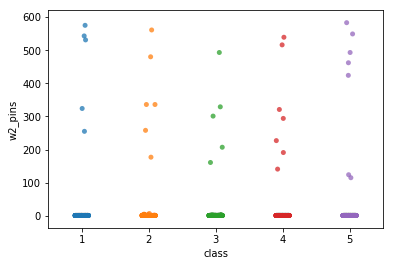

In [6]:
# Your code goes here
ax = sns.stripplot(x = "class", y = "w2_pins", data = news_A, jitter = True, alpha = 0.75)

### ========== Question 1.8 --- [4 marks] ==========
The stripplot illustrates the distribution of a single attribute. We can also visualise the joint distribution of two variables by using a scatter plot. Again, we want to add a bit of noise into the data so that is easier to see which parts of the space (2-dimensional in our case) have larger probability densities. 

For this, you will be using the function `scatter_jitter` provided below. This function takes as input two numpy arrays containing the features of interest. Pick two attributes of your choice from dataset A and use the provided function to plot their joint distribution. You can play around with the amount of noise added by tweaking the `jitter` parameter. Alternatively, you can just use its default value which is set to 0.2.

In [7]:
def scatter_jitter(arr1, arr2, jitter=0.2):
    """ Plots a joint scatter plot of two arrays by adding small noise to each example. 
    Noise is proportional to variance in each dimension. """
    arr1 = np.asarray(arr1)
    arr2 = np.asarray(arr2)
    arr1 = arr1 + jitter*arr1.std(axis=0)*np.random.standard_normal(arr1.shape)
    arr2 = arr2 + jitter*arr2.std(axis=0)*np.random.standard_normal(arr2.shape)
    plt.scatter(arr1, arr2, marker=4)

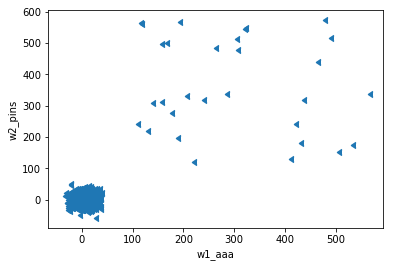

In [8]:
# Your code goes here
ax = scatter_jitter(news_A.w1_aaa, news_A.w2_pins, jitter = 0.3)
plt.xlabel('w1_aaa')
plt.ylabel('w2_pins')
plt.show()

### ========== Question 1.9 --- [7 marks] ==========
From the strip and scatter plots above you might observe that there is something peculiar about the data. Indeed most attributes take very small values (usually in the range 1-10) but there are some data points (i.e. rows) in the dataset where the attributes take very large values. These data points are called [outliers](https://en.wikipedia.org/wiki/Outlier).

You might think that the presence of outliers in the dataset has been a resut of noise contamination (you wouldn't expect the same word to appear 600 times within an e-mail, would you?). Your job now is to create a new dataset from dataset A (name it `news_A_clean`) and remove the outliers. Create some metric to find the outliers and check that your metric is reasonable. Be careful not to alter the original `news_A`...we may require it in its dirty format later...

In [9]:
# Your code goes here
news_A_clean = news_A.copy(deep=True)


for j in range(len(news_A_clean.columns.values) - 1):
    # Since, from the scatter plot above, we can see that most of the data point values
    # are less or equal to 50, it is reasonably to assume that the data points with values 
    # bigger than 50 can be treated as outliers. 
    # 50 is also a value very close to (mean + std) value for most of the attributes
    # (looking at the statistics of tha data in question 1.4.)
    # It also seems reasonable in a 'real life' example. There won't be many words which 
    # occur more than 50 time per document (with some exceptions).
    
    news_A_clean = news_A_clean[news_A_clean[news_A_clean.columns.values[j]] <= 50]

# Metric:
#print(news_A_clean.describe())

news_A_clean

,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
0,1,1,1,1,1,1,1,1,1,1,...,1,5,3,6,8,4,6,4,8,4
1,1,1,1,1,1,1,1,1,1,1,...,2,3,6,8,3,4,5,6,5,4
2,1,1,1,1,1,1,1,1,1,2,...,4,2,6,5,2,5,5,7,8,2
3,1,1,1,1,1,1,1,1,1,1,...,6,3,6,1,1,8,1,8,4,3
4,1,1,1,1,1,1,1,1,1,1,...,6,1,7,8,6,3,1,8,4,3
5,1,1,1,1,1,1,1,1,1,1,...,7,5,4,5,5,7,7,7,2,2
6,1,1,1,1,2,1,1,1,1,1,...,3,6,8,8,3,5,2,1,2,1
7,1,1,1,1,1,1,1,1,1,1,...,2,8,6,2,3,7,8,2,5,3
8,1,1,1,1,1,1,1,1,1,1,...,5,3,7,8,1,2,3,2,6,5
9,1,1,1,1,1,1,1,1,1,1,...,3,7,2,4,1,2,5,7,1,1


### ========== Question 1.10 --- [3 marks] ==========
Write code to return the number of data points in the clean dataset, and the number of documents that have been excluded as outliers

In [10]:
# Your code goes here

# Number of data points in the clean dataset:
points_clean = news_A_clean.shape[0]
print('Number of data points in the clean dataset: {}'.format(points_clean))
# Number of documents that have been excluded as outliers:
points_excluded = news_A.shape[0] - points_clean
print('Number of documents that have been excluded as outliers: {}'.format(points_excluded))

Number of data points in the clean dataset: 2083
Number of documents that have been excluded as outliers: 46


## 2. Naive Bayes classification [60%]
Now we want to fit a Gaussian Naive Bayes model to the cleaned dataset A. You might want first to familiarise yourself with the [`GaussianNB`](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) class in `Sklearn`.

### ========== Question 2.1 --- [4 marks] ==========

By using the `scatter_jitter` function provided above, display a scatter plot of the features `w281_ico` and `w273_tek` for the cleaned dataset A. Set the jitter value to something small (e.g. 0.1). Label axes appropriately.

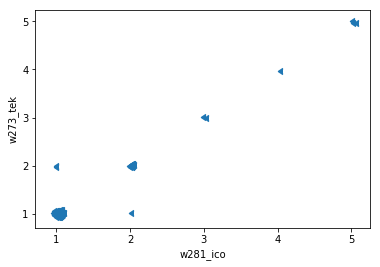

In [12]:
# Your code goes here
ax = scatter_jitter(news_A_clean.w281_ico, news_A_clean.w273_tek, jitter = 0.1)
plt.xlabel('w281_ico')
plt.ylabel('w273_tek')
plt.show()

### ========== Question 2.2 --- [6 marks] ==========
What do you observe? 

How does that relate to the Naive Bayes assumption? 

What would be the main issue we would have to face if we didn't make this assumption?

*Your answer goes here*

From the scatter plot above, we can see that those 2 words (w273 and w281) are highly correlated (usually occur the same number of times each time; the points create a straight line 'shape'). 

Naive Bayes assumes independence between every pair of features, given the class variable. This means that we don't take into account the fact that some of the words might occur more often when they're used together (such as expressions like 'to do' or 'to be able to'). We treat occurence of each word as independent (which is not exactly true in the real life as presented by the example expressions before). We also don't consider the positions of each word in the document ('bag of words' assumption).

If we won't make this assumption, this will require us to provide many more data points (training examples). With the assumption, we have only 521 independent attributes to consider. Without the assumption, there would be 521 x 521 parameters to consider. This means significanly more values are possible, hence the data set (set of the documents) would have to be much bigger to generalise all possibilities.
This assumption also make the computation much faster and the classifier much easier to understand (less conditional probabilities to calculate; we just multiply those probabilities).

### ========== Question 2.3 --- [5 marks] ==========
Fit a Gaussian Naive Bayes model to the cleaned dataset A. Your input features should be all the attributes in the dataset except the `class` attribute which will be your target. Display the classification accuracy on the training dataset.

In [13]:
# Your code goes here
from sklearn.naive_bayes import GaussianNB
X = news_A_clean.drop('class', axis = 1)
y = news_A_clean['class']
clf = GaussianNB()
clf.fit(X, y)
print('Classification accuracy: {}'.format(clf.score(X,y)))
# X.describe()

Classification accuracy: 0.889102256361


### ========== Question 2.4 --- [5 marks] ==========
Plot the (normalised) confusion matrix for the training data. Label axes appropriately.

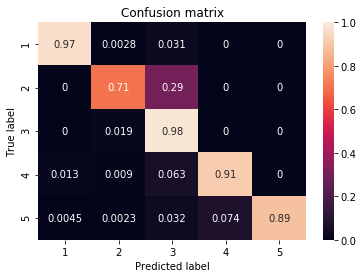

In [14]:
# Your code goes here
from sklearn.metrics import accuracy_score, confusion_matrix
conf_mat = confusion_matrix(y,clf.predict(X))
nor_conf_mat = conf_mat / conf_mat.sum(axis=1)[:, np.newaxis]

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
plt.figure()
plot_confusion_matrix(nor_conf_mat, classes= ['1','2','3','4','5'])

### ========== Question 2.5 --- [3 marks] ==========

Comment on the confusion matrix from the previous question. Does it look like what you would have expected? Explain.

*Your answer goes here*

The confusion matrix looks as expected. The classification accuracy of the model from the previous question is about 0.89. We can see that the values on the diagonal of the confusion matrix (correctly classified classes) average to 0.89. Most of the values (classes 1,3,4) are higher but we should notice that class 2 was correctly classified only in around 71% of the times (often confused with class 3). This is because classes 2 and 3 are both related to hardware. However, the model tends to confuse IBM with Mac than vice versa.

Classes 1 and 3 we predicted most accurately (97% and 98% of the cases respectively).

### ========== Question 2.6 --- [5 marks] ==========
Fit a Gaussian Naive Bayes model to the original dataset A (including the outliers). Display the classification accuracy on the training dataset.

In [15]:
# Your code goes here
X_full = news_A.drop('class', axis = 1)
y_full = news_A['class']
clf_full = GaussianNB()
clf_full.fit(X_full, y_full)
print('Classification accuracy: {}'.format(clf_full.score(X_full, y_full)))
#conf_mat_full = confusion_matrix(y_full,clf_full.predict(X_full))
#conf_mat_full

Classification accuracy: 0.205260685768


### ========== Question 2.7 --- [4 marks] ==========
Comment on the above results (Questions 2.3 & 2.6). In particular explain why you think that cleaning the data helps in this case.

*Your answer goes here*

The classification accuracy of the model fitted with the 'uncleaned' data is only 0.205 which is significantly lower than of the model fitted with the 'cleaned' data (0.889). The accuracy of the model from question 2.6. is not much better that the one of random guessing (1/5 = 0.2). This means that cleaning the data helps significantly with getting more accurate predictions.

Cleaning the data from outliers is particualary helpful in this case (when we use Gaussian Naive Bayes). That is because in Gaussian NB, we use mean and standard deviation to calculate the conditional prababilities (some observation value given the class). This means that even a few extreme values (very big or very small) can significantly change the values of mean and standard deviation of each attribute in each class.
And this is why the classification accuracy of the model from question 2.6. is so much lower than the one from 2.3.

### ========== Question 2.8 --- [5 marks] ==========

Now we want to evaluate the generalisation of the classifier on new (i.e. unseen data). Use the classifier you trained in Question 2.5 (i.e. on the cleaned dataset) and test its performance on dataset `train_20news_partB`. 

Display the (normalized) confusion matrix and the classification accuracy on the Dataset B.

Classification accuracy: 0.828125


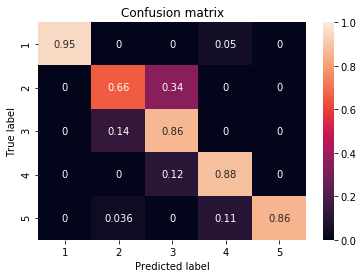

In [37]:
# Your code goes here
X_B = news_B.drop('class', axis = 1)
y_B = news_B['class']

# Print normalised confucion matrix:
prediction = clf.predict(X_B)
conf_mat_B = confusion_matrix(y_B,prediction)
nor_conf_mat_B = conf_mat_B / conf_mat_B.sum(axis=1)[:, np.newaxis]
plot_confusion_matrix(nor_conf_mat_B, classes= ['1','2','3','4','5'])

# Print classification accuracy on the Dataset B:
#print(clf.score(X_B,y_B))
print('Classification accuracy: {}'.format(clf.score(X_B,y_B)))

### ========== Question 2.9 --- [4 marks] ==========

Comment on the results from the previous question. Do you think this is an acceptable level of performance? Which are the easiest and most difficult classes to predict correctly? 

*Your answer goes here*

The classification accuracy of the model on the dataset B is 0.828 which is a bit lower than the one pf the same model on the cleaned dataset A (0.889) but it's still much better than the accuracy of the model from question 2.6. Accuracy of 0.828 seems reasonably high and satisfying.

The easiest class to predict was class 1 (95%; similar as before). This is due to the fact that the topic of atheism (class 1) is not related to other classes (sport or hardware; different words relate to this topic). 

Class 2 was the hardest to predict (66%; the same as before; question 2.3.). Class 2 was very often (34% of the times) confused with class 3. This is due to the fact that they are connected to similar topic (hardware) so similar words can be used in documents in both of those classes.

### ========== Question 2.10 --- [4 marks] ==========
What is a reasonable baseline against which to compare the classiffication performance? *Hint: What is the simplest classiffier you can think of and what would its performance be on this dataset?* 

*Your answer goes here*

The simplest classifier that could be used as a baseline is the one which assignes the value of the most frequent class in the training set (which was fitted into it) to each data point. The accuracy of the model will be equal to the percentage of the most frequent class in the dataset (its frequency).

### ========== Question 2.11 --- [4 marks] ==========

Estimate the baseline performance.

In [28]:
# Your code goes here
A_cp = news_A_clean.copy(deep=True)

X_m = A_cp.drop('class', axis = 1)
y_m = A_cp['class']

c1 = 0
c2 = 0
c3 = 0
c4 = 0
c5 = 0

for k in y_m.index:
    if y_m[k] == 1:
        c1 = c1 + 1
    if y_m[k] == 2:
        c2 = c2 + 1
    if y_m[k] == 3:
        c3 = c3 + 1
    if y_m[k] == 4:
        c4 = c4 + 1
    if y_m[k] == 5:
        c5 = c5 + 1

c_max = max(c1, c2, c3, c4, c5)

print('Classification accuracy: {}'.format(c_max/y_m.shape[0]))

Classification accuracy: 0.214114258281


### ========== Question 2.12 --- [3 marks] ==========

Execute the cell below to get the prediction on the test dataset by using a different classifier which we will be introducing in this class later on. By using this prediction provided below (`rf_prediction`) plot the confusion matrix and display the classification accuracy on the test dataset. *Important: Make sure the test dataset is loaded in a DataFrame called `news_B` otherwise execution will return an error. In that case replace the DataFrame name in the third line.*

Classification accuracy: 0.8515625


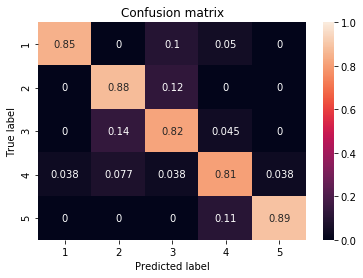

In [51]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 50).fit(X=news_A_clean.drop("class", axis=1), y=news_A_clean["class"])
X_ts = news_B.drop('class', axis=1)
rf_prediction = rf.predict(X=X_ts)
# Your code goes here
y_ts = news_B['class']

# Print normalised confucion matrix:
conf_mat_rf = confusion_matrix(y_ts, rf_prediction)
nor_conf_mat_rf = conf_mat_rf / conf_mat_rf.sum(axis=1)[:, np.newaxis]
plot_confusion_matrix(nor_conf_mat_rf, classes= ['1','2','3','4','5'])

# Print classification accuracy:
print('Classification accuracy: {}'.format(rf.score(X_ts,y_ts)))

### ========== Question 2.13 --- [8 marks] ==========

Which classifier (Naive Bayes or Random Forest) would you trust if you had to choose? What are the reasons you believe the Gaussian Naive Bayes classifier does not perofm so well in this particular problem? You are not expected to justify the performance level achieved by the Random Forest classifier. Feel free to use code and plots to illustrate your points.

*Your answer goes here*

Both of those models have similar classification accuracy (0.88-0.90 interval). The biggest difference the way they predict particular classes (diagonal of their confusion matrices). 

Because of the Naive Bayes assumption (independance assumption), NB classifier performed very well on predicting classes which were not related with any other classes in the dataset (atheism). But struggles with more accurate prediction when classes were similar (sport, hardware). In this case, the words used in those classes might be similar and our classifier did not perform well (class 2 and 3; IBM and Mac).

On the other hand, Random Forest classifier performed better at telling the difference between 2 related classes (sport). However, it wasn't as accurate as NB with predicting the classes which were about completely unralated topics (atheism). Overall, RF has a very similar classification accuracy as NB classifier. 

It is not straightforward to decide which classifier is better. This highly depends on the task that we are trying to perform. If all the classes in the dataset are somehow related to each other, then NB will preform quite poorly. However, if the classes are not much related to each other (more independent). NB should be a better choice. This is always a trade-off between a very high accuracy of unrelated classes and lower for more dependent ones (NB) and more "spread" accuracy (RF; where the classification accuracy for each class is more similar).

In this case, Random Forest seems like a better choice since we will distinguish documents related with sport or hardware more accurately (baseball from hockey or IBM from Mac; because our dataset considers classes which are related to each other).

In [ ]:
# Your code goes here
# The same accuracy for both
# RF better at distinguishing class 2 and 3 from each other but worse in classifying class 1